# FIS0173: Modello di Ising - K-means clustering
<script
  src="https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML"
  type="text/javascript">
</script>

In questo notebook riprendiamo i risultati ottenuti con la PCA sul modello di Ising della scorsa lezione. Scopo di questo notebook è mostrare come funziona l'algoritmo di K-means clustering in questo caso.
In questo notebook si usano configurazioni del modello di Ising diverse da quelle utilizzate nella lezione precedente; specificamente, si considerano 5000 configurazioni su un reticolo bidimensionale di dimensione 40x40.

## Inizializzazione ed esplorazione
Prima di tutto carichiamo le librerie rilevanti.

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt 

Carichiamo ora i dati, che supponiamo essere il risultato della PCA fatta nella lezione precedente (con i corrispondenti valori di temperatura).

In [2]:
df1 = pd.read_csv("data/Ising_clustering_comp.csv",header=None) 
df2 = pd.read_csv("data/Ising_clustering_temp.csv",header=None)

Eseguiamo ora una minima manipolazione dei dati.

In [3]:
df1 = df1.to_numpy()
df2 = df2.to_numpy()
principalComponents = df1
t = df2
t = t.T

Riproduciamo il plot della lezione precedente, in cui proiettiamo i dati sulle prime due compoennti principali.

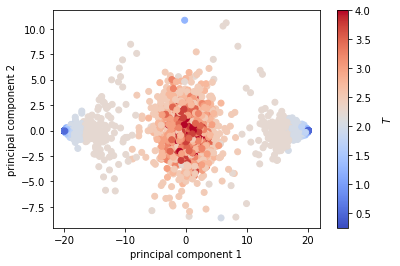

In [4]:
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=t,cmap="coolwarm") 
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
cb = plt.colorbar()
cb.set_label(label='$T$',labelpad=10)
plt.show()
pc = principalComponents

Osserviamo, in maniera più chiara rispetto alla lezione precedente, che i dati si dispongon in tre clusters distinti.

## Algoritmo K-means

Costruiamo ora l'algoritmo K-means.

Importiamo il modulo che ci consente di generare numeri casuali.

In [5]:
import random

Scegliamo tre clusters.

In [6]:
K=3

Scegliamo punti casuali come centroidi.

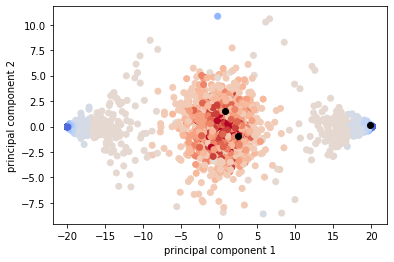

In [7]:
a = random.sample(range(0, len(principalComponents)-1), K)
Centroids = np.zeros((K,2))
for i in range(K):
  Centroids[i,0] = principalComponents[a[i],0]
  Centroids[i,1] = principalComponents[a[i],1]

plt.scatter(principalComponents[:,0],principalComponents[:,1],c=t,cmap="coolwarm")
plt.scatter(Centroids[:,0],Centroids[:,1],c='black')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

Costruiamo un dataframe per i centroidi.

In [8]:
principalComponents = principalComponents.tolist()
Centroids = Centroids.tolist()
principalComponents = pd.DataFrame(principalComponents)
Centroids = pd.DataFrame(Centroids)
principalComponents.columns = ['pca1','pca2']
Centroids.columns = ['pca1','pca2']

Eseguiamo ora i seguenti passi:

- assegniamo tutti i punti al centroide più vicino;
- rideterminiamo i centroidi dei nuovi clussters così formati;
- ripetiamo le due operazioni precedenti fino a convergenza.

In [9]:
diff = 1
j = 0 

while (diff!=0):
    XD = principalComponents
    i = 1
    for index1,row_c in Centroids.iterrows():
        ED = []
        for index2,row_d in XD.iterrows():
            d1 = (row_c["pca1"] - row_d["pca1"])**2
            d2 = (row_c["pca2"] - row_d["pca2"])**2
            d = np.sqrt(d1+d2)
            ED.append(d)
        principalComponents[i] = ED
        i = i + 1
        
    C=[]
    for index,row in principalComponents.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i + 1
        C.append(pos)
    principalComponents["Cluster"]=C
    Centroids_new = principalComponents.groupby(["Cluster"]).mean()[["pca2","pca1"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['pca2'] - Centroids['pca2']).sum() + (Centroids_new['pca1'] - Centroids['pca1']).sum()
        print(diff.sum())
    Centroids = principalComponents.groupby(["Cluster"]).mean()[["pca2","pca1"]]

-9.013160358633444
-0.8309680943761162
-0.023962711566534692
0.0


Ridisegniamo i punti con colori diversi rispetto al cluster di appartenenza.

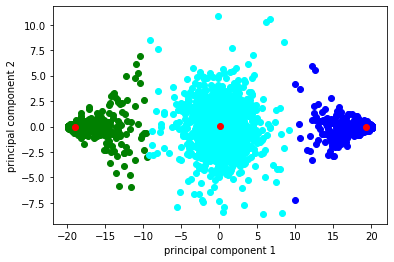

In [10]:
color=['blue','green','cyan','red','yellow']
for k in range(K):
    data=principalComponents[principalComponents["Cluster"]==k+1]
    plt.scatter(data["pca1"],data["pca2"],c=color[k])
plt.scatter(Centroids["pca1"],Centroids["pca2"],c='red')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()